Check the rivers and move if necessary

In [40]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

%matplotlib inline

### Open the Files

In [19]:
old_rivers_file = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/rivers/rivers_month_allArms.nc')
old_runoff = old_rivers_file.variables['rorunoff'][0]
old_rivers_file.close()

In [8]:
bathy_file = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy = bathy_file.variables['Bathymetry'][:]
bathy_file.close()

In [46]:
oldbathy_file = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
oldbathy = oldbathy_file.variables['Bathymetry'][:]
oldbathy_file.close()

### Set up the Plotting

In [54]:
# check bathymetry
count = 0
ii, jj = np.where(old_runoff > 0.)
for i, j in zip(ii, jj):
    if oldbathy[i, j] >= 4:
        count += 1
    else:
        print ('Old ', i, j, oldbathy[i, j])
print (count)
count = 0
for i, j in zip(ii, jj):
    if bathy[i, j] >= 4:
        count += 1
    else:
        print ('New ',i, j, bathy[i, j], old_runoff[i, j])
print (count)
print ("on the south boundary", jj[ii == 0], old_runoff[ii == 0, jj[ii == 0]])
print ("on the west boundary", ii[jj == 0], old_runoff[ii[jj == 0], jj== 0])
print ("on the north boundary", jj[ii == 897], old_runoff[ii == 897, jj[ii == 897]])
print ("on the east boundary", ii[jj == 397], old_runoff[ii[jj == 397], jj== 397])

161
New  10 195 -- 0.582787
New  48 197 -- 0.0220814
New  60 149 -- 0.0222095
New  64 153 -- 0.0222076
New  68 210 -- 0.0497651
New  73 149 -- 0.0222318
New  74 153 -- 0.0444505
New  75 103 -- 0.119175
New  88 246 -- 0.295163
New  95 118 -- 0.00595015
New  113 174 -- 0.0111315
New  119 167 -- 0.0415882
New  124 177 -- 0.0594151
New  137 215 -- 0.0148588
New  143 318 -- 1.63944
New  146 199 -- 0.104134
New  149 208 -- 0.0148792
New  182 219 -- 0.0746571
New  185 240 -- 0.0597553
New  199 202 -- 0.0149556
New  345 35 -- 0.14701
New  348 31 -- 0.0734996
New  362 357 -- 0.00769356
New  500 395 -- 8.10384
New  541 175 -- 0.135782
New  563 150 -- 0.135851
New  578 137 -- 0.054376
New  617 120 -- 0.0409057
New  648 121 -- 0.0273798
New  705 122 -- 0.16658
New  749 123 -- 0.338642
New  770 117 -- 0.0640528
New  839 107 -- 0.00553165
New  844 93 -- 0.00458729
New  848 87 -- 0.00640779
New  891 45 -- 0.00446882
New  897 294 -- 0.633499
124
on the south boundary [137] [ 0.44179672]
on the west bo

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 898 but corresponding boolean dimension is 161
/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 398 but corresponding boolean dimension is 161
/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 898 but corresponding boolean dimension is 161
/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 398 but corresponding boolean dimension is 161


In [13]:
cmap = cm.deep
cmap.set_bad('darkgreen')

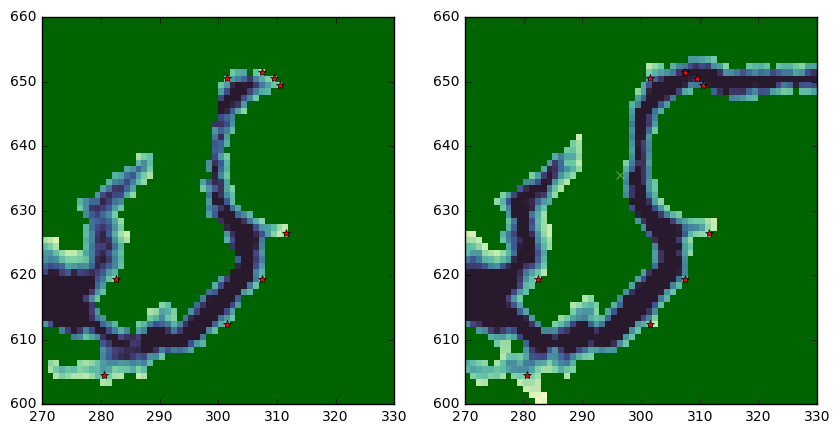

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
imin = 600; jmin = 270
di = 60; dj = 60
axs[0].pcolormesh(oldbathy, cmap=cmap)
axs[0].set_xlim((jmin, jmin+dj))
axs[0].set_ylim((imin, imin+di))
for i in range(imin, imin+di):
    for j in range(jmin, jmin+dj):
        if old_runoff[i, j] > 0:
            axs[0].plot(j+0.5, i+0.5, 'r*')
axs[1].pcolormesh(bathy, cmap=cmap)
axs[1].set_xlim((jmin, jmin+dj))
axs[1].set_ylim((imin, imin+di))
for i in range(imin, imin+di):
    for j in range(jmin, jmin+dj):
        if old_runoff[i, j] > 0:
            axs[1].plot(j+0.5, i+0.5, 'r*')
axs[1].plot(298-2+0.5, 636-1+0.5, 'yx')

In [ ]:
# Need Splitting:
'DeerJohnsGoldboroughMillSkookumKennedySchneider': {
                'prop': 0.375 * WRIA14, 'i': 47, 'j': 130, 'di': 1, 'dj': 1, 'depth': 3,
            },
            'DeerJohnsGoldboroughMillSkookumKennedySchneiderPerry': {
                'prop': 0.475 * WRIA14, 'i': 20, 'j': 120, 'di': 1, 'dj': 1, 'depth': 3,
            },
            'McClaneDeschutesWoodwardWoodland': {
                'prop': 1.0 * WRIA13, 'i': 22, 'j': 121, 'di': 1, 'dj': 1, 'depth': 3,
            },
